In [1]:
import sys
sys.path.append("..")
import seaborn as sns
%matplotlib inline
sns.set(rc={'image.cmap': 'Purples_r'})

#Introducing the objects
Here we will introduce the different objects involved in the Naming Games models we are using. You can go directly to subsections and execute the code from there, they are independant.

##Vocabulary
First object is the vocabulary. It represents a lexical description of objects. That is to say, associations between $\textit{words}$ and $\textit{meanings}$. Here we consider vocabularies as being matrices filled with 0s or 1s, of size (\#meanings,\#words). The words and meanings are here symbolic, it means they can be refered to only by their respective column (for words) or line (for meanings) number in the matrix.

In [2]:
from naminggamesal import ngvoc 

We create an object vocabulary, of type sparse (more info on other possibilities: Design_newVocabulary.ipynb), and size M=5,W=10

In [3]:
voc_cfg={
    'voc_type':'sparse_matrix',
    'M':5,
    'W':10
    }
voctest=ngvoc.Vocabulary(**voc_cfg)

In [4]:
voctest

It is initiated completely empty.

In [5]:
print(voctest)

                          Words
        [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]



###Manipulate the vocabulary
We can then <u>add</u> an association between meaning 3 and word 4 (of value 1). This means that to refer to meaning 3, an agent using this vocabulary would use word 4.

In [6]:
voctest.add(0,1,1)
print(voctest)

                          Words
        [[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]



To remove the link, simply add it with value 0.

In [7]:
voctest.add(3,4,0)
print(voctest)

                          Words
        [[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]



Let's <u>fill</u> the entire matrix with ones

In [8]:
voctest.fill()
print(voctest)

                          Words
        [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
         [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Meanings [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
         [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
         [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]



We can <u>remove homonyms or synonyms</u> of a meaning/word association

In [9]:
voctest.rm_hom(2,2)
print(voctest)

                          Words
        [[ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]
         [ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]
Meanings [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
         [ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]
         [ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]]



In [10]:
voctest.fill()
voctest.rm_syn(3,4)
print(voctest)

                          Words
        [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
         [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Meanings [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
         [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
         [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]



###Useful functions
Such as finding special subsets of meanings or words, and picking meanings and words among them. First we initialize a random vocabulary, and then apply all the functions. 

Note: Small values of M and W let you see more clearly what's happening locally, high values may be more interesting for the visualizations.

In [11]:
import random
import matplotlib.pyplot as plt

voc_cfg2={
    'voc_type':'sparse_matrix',
    'M':5,
    'W':10
    }

nlink=10

voctest2=ngvoc.Vocabulary(**voc_cfg2)
for i in range(0,nlink):
    voctest2.add(random.randint(0, voc_cfg2['M']-1),random.randint(0, voc_cfg2['W']-1),1)
print(voctest2)

                          Words
        [[ 1.  0.  0.  0.  1.  0.  0.  0.  1.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
         [ 0.  0.  0.  0.  0.  1.  0.  1.  1.  0.]]



Here you can modify the $voctest2$ variable by hand before executing the code:

In [12]:
#voctest2.add(0,0,1)
#voctest2.add(0,0,0)

In [13]:
print("Vocabulary:")
print(voctest2)
print("")

print("Known words:")
print(voctest2.get_known_words())
print("Random known word:")
print(voctest2.get_random_known_w())
print("")
print("Unknown words:")
print(voctest2.get_unknown_words())
print("New unknown word:")
print(voctest2.get_new_unknown_w())
print("")
print("Known meanings:")
print(voctest2.get_known_meanings())
print("Random known meaning:")
print(voctest2.get_random_known_m())

print("")
print("Unknown meanings:")
print(voctest2.get_unknown_meanings())
print("New unknown meaning:")
print(voctest2.get_new_unknown_m())
print("")
print("")
print("Known words for meaning 1:")
print(voctest2.get_known_words(1))
print("Random known word for meaning 1:")
print(voctest2.get_random_known_w(1))
print("")
print("Unknown words for meaning 1:")
print(voctest2.get_unknown_words(1))
print("")
print("Known meanings for word 2:")
print(voctest2.get_known_meanings(2))
print("Random known meaning for word 2:")
print(voctest2.get_random_known_m(2))
print("")
print("Unknown meanings for word 2:")
print(voctest2.get_unknown_meanings(2))


Vocabulary:
                          Words
        [[ 1.  0.  0.  0.  1.  0.  0.  0.  1.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
         [ 0.  0.  0.  0.  0.  1.  0.  1.  1.  0.]]


Known words:
[0, 3, 4, 5, 6, 7, 8]
Random known word:
[[[0 0]]

 [[0 4]]

 [[0 8]]

 [[2 3]]

 [[3 6]]

 [[3 7]]

 [[4 5]]

 [[4 7]]

 [[4 8]]]
[(0, 0), (0, 4), (0, 8), (2, 3), (3, 6), (3, 7), (4, 5), (4, 7), (4, 8)]
[0, 4, 8, 3, 6, 7, 5, 7, 8]
6

Unknown words:
[1, 2, 9]
New unknown word:
1

Known meanings:
[0, 2, 3, 4]
Random known meaning:
2

Unknown meanings:
[1]
New unknown meaning:
1


Known words for meaning 1:
[]
Random known word for meaning 1:
[[[0 0]]

 [[0 1]]

 [[0 2]]

 [[0 3]]

 [[0 4]]

 [[0 5]]

 [[0 6]]

 [[0 7]]

 [[0 8]]

 [[0 9]]]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1

Unknown words for meaning

We introduce here a representation of the degree of synonymy/homonymy of the vocabulary. Colors are the same on a line/column. Light colors indicate high degree of synonymy/homonymy, dark ones low degree.

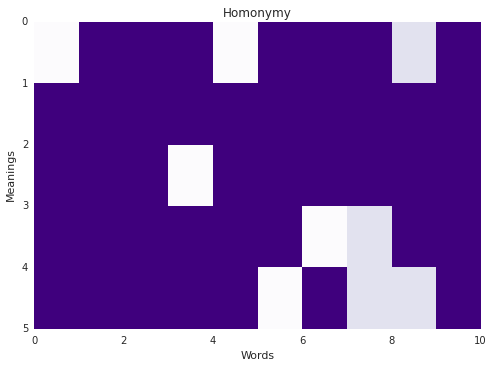

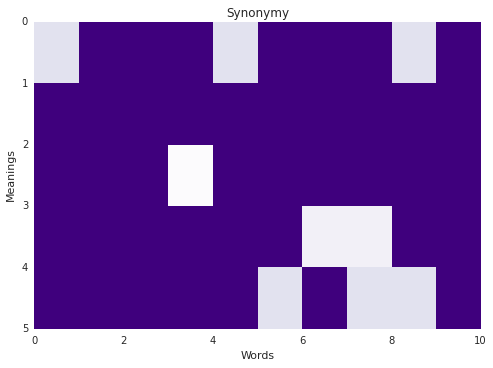

In [14]:
voctest2.visual(vtype="hom")
plt.figure()
voctest2.visual(vtype="syn")